In [21]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2
import os
import seaborn as sns
import pandas as pd
from skimage.filters import sobel
from skimage.feature import graycomatrix, graycoprops
from skimage.measure import shannon_entropy
import lightgbm as lgb
SIZE=128
os.listdir("natural_images")

['test', 'train']

<h2>CREATE TRAIN & TEST DATASET</h2>

In [22]:
def create_dataset(type,SIZE):
    images = []
    labels = [] 

    for label in os.listdir(f'natural_images/{type}'):
        for object in os.listdir(f'natural_images/{type}/'+label):
            labels.append(label)
            img=cv2.imread(f'natural_images/{type}/{label}/{object}',0)
            img=cv2.resize(img,(SIZE,SIZE))
            images.append(img)
    
    images=np.array(images)
    labels=np.array(labels)
    return images,labels

In [23]:
x_train, y_train=create_dataset('train',SIZE)
x_test, y_test=create_dataset('test',SIZE)

<i><h4>Because labels are string, so we need to transform them into interger</h4></i>

In [24]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y_test)
test_labels_encoded = le.transform(y_test)
le.fit(y_train)
train_labels_encoded = le.transform(y_train)

<h2>GLCM FEATURE EXTRACTION</h2>

In [25]:
#Create function to calculate entropy texture
def cal_entropy(glcm):
    s_glcm=glcm+glcm.T 
    n_glcm=s_glcm/np.sum(s_glcm)
    entropy_matrix=-np.log(n_glcm+1e-6)
    return np.sum(entropy_matrix*n_glcm)

In [26]:
def feature_extractor(dataset):
    image_dataset = pd.DataFrame()
    for image in range(dataset.shape[0]):           
        df = pd.DataFrame()  
        img = dataset[image, :,:]
        #Full image
        #GLCM = graycomatrix(img, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4])
        GLCM = graycomatrix(img, [1], [0])       
        GLCM_Energy = graycoprops(GLCM, 'energy')[0]
        df['Energy'] = GLCM_Energy
        GLCM_corr = graycoprops(GLCM, 'correlation')[0]
        df['Corr'] = GLCM_corr       
        # GLCM_diss = graycoprops(GLCM, 'dissimilarity')[0]
        # df['Diss_sim'] = GLCM_diss       
        GLCM_hom = graycoprops(GLCM, 'homogeneity')[0]
        df['Homogen'] = GLCM_hom       
        GLCM_contr = graycoprops(GLCM, 'contrast')[0]
        df['Contrast'] = GLCM_contr
        GLCM_entropy = cal_entropy(GLCM[:,:,0,0])
        df['Entropy'] = GLCM_entropy


        GLCM2 = graycomatrix(img, [3], [0])       
        GLCM_Energy2 = graycoprops(GLCM2, 'energy')[0]
        df['Energy2'] = GLCM_Energy2
        GLCM_corr2 = graycoprops(GLCM2, 'correlation')[0]
        df['Corr2'] = GLCM_corr2       
        # GLCM_diss2 = graycoprops(GLCM2, 'dissimilarity')[0]
        # df['Diss_sim2'] = GLCM_diss2       
        GLCM_hom2 = graycoprops(GLCM2, 'homogeneity')[0]
        df['Homogen2'] = GLCM_hom2       
        GLCM_contr2 = graycoprops(GLCM2, 'contrast')[0]
        df['Contrast2'] = GLCM_contr2
        GLCM_entropy2 = cal_entropy(GLCM2[:,:,0,0])
        df['Entropy2'] = GLCM_entropy2

        GLCM3 = graycomatrix(img, [5], [0])       
        GLCM_Energy3 = graycoprops(GLCM3, 'energy')[0]
        df['Energy3'] = GLCM_Energy3
        GLCM_corr3 = graycoprops(GLCM3, 'correlation')[0]
        df['Corr3'] = GLCM_corr3       
        # GLCM_diss3 = graycoprops(GLCM3, 'dissimilarity')[0]
        # df['Diss_sim3'] = GLCM_diss3       
        GLCM_hom3 = graycoprops(GLCM3, 'homogeneity')[0]
        df['Homogen3'] = GLCM_hom3       
        GLCM_contr3 = graycoprops(GLCM3, 'contrast')[0]
        df['Contrast3'] = GLCM_contr3
        GLCM_entropy3 = cal_entropy(GLCM3[:,:,0,0])
        df['Entropy3'] = GLCM_entropy3

        GLCM4 = graycomatrix(img, [0], [np.pi/4])       
        GLCM_Energy4 = graycoprops(GLCM4, 'energy')[0]
        df['Energy4'] = GLCM_Energy4
        GLCM_corr4 = graycoprops(GLCM4, 'correlation')[0]
        df['Corr4'] = GLCM_corr4       
        # GLCM_diss4 = graycoprops(GLCM4, 'dissimilarity')[0]
        # df['Diss_sim4'] = GLCM_diss4       
        GLCM_hom4 = graycoprops(GLCM4, 'homogeneity')[0]
        df['Homogen4'] = GLCM_hom4       
        GLCM_contr4 = graycoprops(GLCM4, 'contrast')[0]
        df['Contrast4'] = GLCM_contr4
        GLCM_entropy4 = cal_entropy(GLCM4[:,:,0,0])
        df['Entropy4'] = GLCM_entropy4
        
        GLCM5 = graycomatrix(img, [0], [np.pi/2])       
        GLCM_Energy5 = graycoprops(GLCM5, 'energy')[0]
        df['Energy5'] = GLCM_Energy5
        GLCM_corr5 = graycoprops(GLCM5, 'correlation')[0]
        df['Corr5'] = GLCM_corr5       
        # GLCM_diss5 = graycoprops(GLCM5, 'dissimilarity')[0]
        # df['Diss_sim5'] = GLCM_diss5       
        GLCM_hom5 = graycoprops(GLCM5, 'homogeneity')[0]
        df['Homogen5'] = GLCM_hom5       
        GLCM_contr5 = graycoprops(GLCM5, 'contrast')[0]
        df['Contrast5'] = GLCM_contr5
        GLCM_entropy5 = cal_entropy(GLCM5[:,:,0,0])
        df['Entropy5'] = GLCM_entropy5
        
        #Add more filters as needed
        #entropy = shannon_entropy(img)
        #df['Entropy'] = entropy

        
        #Append features from current image to the dataset
        image_dataset = image_dataset.append(df)
        
    return image_dataset

In [27]:
#Extract features from training images
image_features = feature_extractor(x_train)
X_for_ML =image_features

In [28]:
import lightgbm as lgb
 #Class names for LGBM start at 0 so reassigning labels from 1,2,3,4 to 0,1,2,3
d_train = lgb.Dataset(X_for_ML, label=train_labels_encoded)

In [29]:
lgbm_params = {'learning_rate':0.05, 'boosting_type':'dart',    
              'objective':'multiclass',
              'metric': 'multi_logloss',
              'num_leaves':100,
              'max_depth':10,
              'num_class':len(np.unique(test_labels_encoded))} 

In [30]:
lgb_model = lgb.train(lgbm_params, d_train, 100)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005273 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4845
[LightGBM] [Info] Number of data points in the train set: 6547, number of used features: 19
[LightGBM] [Info] Start training from score -2.234254
[LightGBM] [Info] Start training from score -1.983257
[LightGBM] [Info] Start training from score -2.064132
[LightGBM] [Info] Start training from score -2.263200
[LightGBM] [Info] Start training from score -2.100901
[LightGBM] [Info] Start training from score -1.930300
[LightGBM] [Info] Start training from score -2.178762
[LightGBM] [Info] Start training from score -1.939819
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

<h2>PREDICT ON TEST DATA</h2>

In [31]:
#Extract features from test data and reshape, just like training data
test_features = feature_extractor(x_test)
test_features = np.expand_dims(test_features, axis=0)
test_for_RF = np.reshape(test_features, (x_test.shape[0], -1))

In [32]:
#Predict on test
test_prediction = lgb_model.predict(test_for_RF)
test_prediction=np.argmax(test_prediction, axis=1)

In [33]:
#Inverse le transform to get original label back. 
test_prediction = le.inverse_transform(test_prediction)
test_prediction

array(['airplane', 'airplane', 'airplane', 'airplane', 'airplane',
       'airplane', 'airplane', 'airplane', 'airplane', 'airplane',
       'flower', 'motorbike', 'airplane', 'airplane', 'airplane',
       'airplane', 'airplane', 'motorbike', 'airplane', 'flower',
       'airplane', 'airplane', 'airplane', 'airplane', 'airplane',
       'airplane', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car',
       'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car',
       'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car',
       'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car',
       'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car',
       'car', 'car', 'car', 'car', 'car', 'dog', 'car', 'car', 'car',
       'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car',
       'car', 'car', 'car', 'car', 'car', 'cat', 'cat', 'cat', 'cat',
       'cat', 'cat', 'flower', 'dog', 'car', 'cat', 'person', 'dog',
       'cat', 'airplane', 'fruit'

In [34]:
#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(y_test, test_prediction))

Accuracy =  0.7727272727272727


<AxesSubplot:>

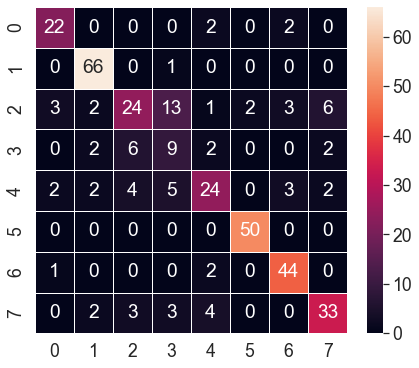

In [35]:
#Print confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, test_prediction)
fig, ax = plt.subplots(figsize=(7,6))         # Sample figsize in inches
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)

<h2>Check results on a few random images</h2>

In [36]:
#Create function predict
def predict(img):
    #Extract features and reshape to right dimensions
    input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
    input_img_features=feature_extractor(input_img)
    input_img_features = np.expand_dims(input_img_features, axis=0)
    input_img_for_RF = np.reshape(input_img_features, (input_img.shape[0], -1))

    img_prediction = lgb_model.predict(input_img_for_RF)
    img_prediction=np.argmax(img_prediction, axis=1)
    img_prediction = le.inverse_transform([img_prediction])  #Reverse the label encoder to original name
    print("The prediction for this image is: ", img_prediction)
    print("The actual label for this image is: ", y_test[n])

C:\Users\iamca\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


The prediction for this image is:  ['airplane']
The actual label for this image is:  flower


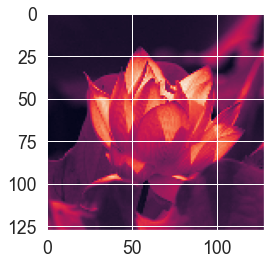

In [37]:
import random
n=random.randint(0, x_test.shape[0]-1) #Select the index of image to be loaded for testing
img = x_test[n]
plt.imshow(img)
predict(img)

<h2>SAVE MODEL</h2>

In [38]:
lgb_model.save_model('lgb_classifier3.txt', num_iteration=lgb_model.best_iteration) 

In [39]:
#How to load it
# model = lgb.Booster(model_file='lgb_classifier2.txt')